In [1]:
import pandas as pd
df = pd.read_csv("kc_house_data.csv")
df.head()

X = df[['grade']].as_matrix()
Y = df[['price']].as_matrix().flat

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

lr.fit(X_train, Y_train)
lr.coef_, lr.intercept_

(array([ 209016.48186766]), -1059619.4448750583)

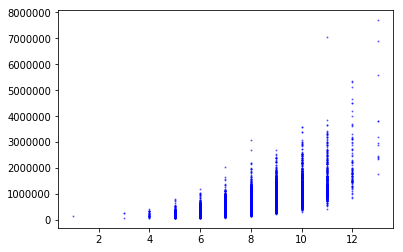

In [2]:
import matplotlib.pyplot as plt

plt.scatter(X, Y, color="b", s=1, alpha=0.5)
plt.show()

In [3]:
train_predicted = lr.predict(X_train);
test_predicted = lr.predict(X_test);

from sklearn import metrics
metrics.r2_score(Y_test, test_predicted)

0.45867740697571657

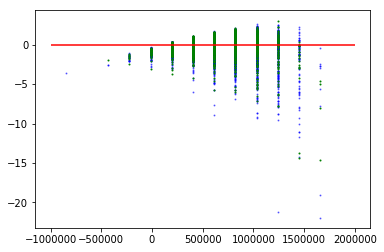

In [4]:
from sklearn import preprocessing
train_residualScaled = preprocessing.scale(train_predicted - Y_train)
test_residualScaled = preprocessing.scale(test_predicted - Y_test)

import matplotlib.pyplot as plt

plt.scatter(train_predicted, train_residualScaled, color="b", s=1, alpha=0.5)
test_predicted = lr.predict(X_test)
plt.scatter(test_predicted, test_residualScaled, color="g", s=1)
plt.hlines(y=0, xmin=-1000000, xmax=2000000, color="r")
plt.show()